In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install fastai==1.0.48


In [0]:
!pip show fastai

Name: fastai
Version: 1.0.48
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: spacy, packaging, nvidia-ml-py3, torchvision, dataclasses, fastprogress, bottleneck, requests, pyyaml, matplotlib, numexpr, torch, typing, pandas, numpy, Pillow, scipy, beautifulsoup4
Required-by: 


In [0]:
from fastai.text import *
from fastai import *

In [0]:
torch.cuda.is_available()


True

In [0]:
torch.backends.cudnn.enabled


True

In [0]:
from IPython.display import SVG, display


In [0]:

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/remarks/"

data_clas.pkl  remarks_dataset.csv  sexist_remarks.xlsx


In [0]:
path = '/content/drive/My Drive/remarks'


In [0]:
path

'/content/drive/My Drive/remarks'

In [0]:
df = pd.read_csv('/content/drive/My Drive/remarks/remarks_dataset.csv')
df.head(10)

,Label,Comment,is_valid
0,positive,Let's hope that the key conferences aren't whe...,False
1,positive,Did you hear the one about the woman who is at...,False
2,positive,"I think she's hot .... She's tiny, she's short...",False
3,positive,Didn't men give you the kitchen?,False
4,positive,I'm a huge supporter of women. ... Feminism is...,False
5,positive,Can you believe that? A female linesman. Women...,False
6,positive,Men are very competent in their workplace - an...,True
7,positive,the better looking these women are like Michel...,True
8,positive,boys will be boys,True
9,positive,despite being a woman,True


In [0]:
df.tail(100)

,Label,Comment,is_valid
726,negative,What you doing,False
727,negative,You having a nice time,False
728,negative,Slow down,False
729,negative,Not had it yet,False
730,negative,Well there was some and this morning,True
731,negative,I know Ben,True
732,negative,Since what five o'clock,True
733,negative,You'll probably get them tomorrow then,True
734,negative,Have they all gone,False
735,negative,It was terrible,False


In [0]:
df.columns


Index(['Label', 'Comment', 'is_valid'], dtype='object')

In [0]:
df['Comment'][11]

'Now, anyone can be cast to play a goddess. They can cast someone who you want to pray to when you look at them, they can also cast someone you want to call towards you when you see them!'

In [0]:
df[df['is_valid'] == True]


,Label,Comment,is_valid
6,positive,Men are very competent in their workplace - an...,True
7,positive,the better looking these women are like Michel...,True
8,positive,boys will be boys,True
9,positive,despite being a woman,True
12,positive,Only women from the affluent classes can get a...,True
33,positive,You need to smile more,True
35,positive,Can I speak to one of the guys who knows what ...,True
51,positive,"‘Ah, come on. When blokes talk like that it’s ...",True
53,positive,"‘Oh, god, don’t tell me you’re a feminist.’",True
55,positive,‘The gender pay gap is a myth.’,True


In [0]:
df['Label'].unique()


array(['positive', 'negative'], dtype=object)

In [0]:
df['is_valid'].unique()


array([False,  True])

In [0]:
df.isna().sum()


Label       0
Comment     0
is_valid    0
dtype: int64

In [0]:
data_lm = (TextList.from_csv(path, 'remarks_dataset.csv', cols='Comment')
                   .split_by_rand_pct()
                   .label_for_lm()
                   .databunch())
data_lm.save()


In [0]:
data_lm.show_batch()


idx,text
0,"xxunk to xxunk ? xxmaj when she xxunk xxunk xxunk and xxunk to speak , her xxunk xxunk over to hear her xxunk xxunk and to xxunk xxunk , ' xxmaj where is that xxunk xxunk ? xxbos i think she 's hot xxrep 4 . xxmaj she 's xxunk , she 's short . xxmaj she 's got a xxunk little body on her . xxmaj xxunk - xxunk"
1,"xxmaj did n't men give you the xxunk ? xxbos i 'm a xxunk xxunk of women . ... xxmaj feminism is what i xxunk . xxmaj feminism has xxunk women xxunk . i love women . i do n't know how this all got xxunk . i love the women 's xxunk , xxunk when xxunk behind it . xxbos xxmaj can you xxunk that ? a female xxunk"
2,"xxunk and that kind of thing . xxbos boys will be boys xxbos xxmaj they do n't know what kind of dress they should wear for xxunk xxunk . xxmaj do they think that only if they wear xxunk xxunk will xxunk and xxunk give them xxunk ? i do n't mind even if my xxunk xxunk them . xxbos xxmaj now , xxunk can be cast to xxunk a"
3,"xxunk can get xxunk in life , but xxunk you xxunk women will never get a chance because you are not that xxunk . xxbos xxmaj as time xxunk , the xxunk of the xxunk xxunk , just like a wife xxunk old and xxunk her xxunk . xxbos xxmaj xxunk xxunk xxunk , this is a xxunk matter . xxmaj this is not a xxunk xxunk . xxbos i"
4,"get xxunk . xxmaj that was a xxunk - xxunk woman . xxmaj look at this woman . xxmaj everything was xxunk from her , xxunk which she xxunk all her xxunk to get xxunk xxbos xxmaj you are xxunk a xxunk of woman . xxmaj you do not want kids it 's your job to xxunk at home , have kids and xxunk . xxbos xxmaj you should get"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


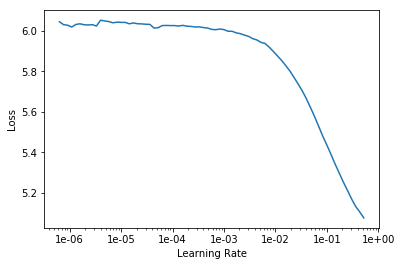

In [0]:
learn.recorder.plot(skip_end=15)


In [0]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,6.042767,4.747664,0.262054,00:00


In [0]:
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

In [0]:
learn.show_results()

text,target,pred
xxbos xxmaj you xxunk he 's at work xxbos xxmaj is the manager in xxunk ? i would love to,to him xxbos xxmaj xxunk your are not doing xxunk why do n't you get into the xxunk where you,about you about xxmaj xxunk xxunk xxunk xxunk xxunk your xxunk you you do do you xxunk xxunk ? you
xxunk your are not doing xxunk why do n't you get into the xxunk where you xxunk xxbos xxmaj is,your real hair ? xxbos xxmaj there they are xxbos xxmaj xxunk girl xxbos xxmaj that xxunk xxbos because i,xxunk xxunk xxunk ? xxmaj xxmaj xxunk 's 're xxunk xxbos xxunk xxunk xxunk xxmaj xxunk 's xxunk xxmaj xxmaj
xxmaj there they are xxbos xxmaj xxunk girl xxbos xxmaj that xxunk xxbos because i 'm i 'm so busy,xxmaj no that 's xxunk xxmaj xxunk xxunk a i know xxunk and they want to xxunk xxunk a xxunk,xxmaj xxunk xxunk xxunk what xxunk xxunk xxunk xxunk xxunk xxunk i xxunk xxunk 're you xxunk xxunk xxunk xxunk
xxmaj xxunk xxunk a i know xxunk and they want to xxunk xxunk a xxunk to do a xxunk how,xxunk have we had xxunk xxbos xxmaj three xxbos but that did n't happen very xxunk to us because it,xxunk you xxunk xxunk xxunk xxunk xxmaj xxunk xxunk xxmaj xxunk xxunk not do because well . xxunk because it
xxunk xxbos xxmaj three xxbos but that did n't happen very xxunk to us because it was just being xxunk,xxmaj no i do n't think i i 'm too old now xxbos xxmaj xxunk . xxbos xxmaj no i,xxmaj xxunk xxunk think think think i think think xxunk xxunk xxunk i xxmaj xxunk xxunk xxmaj xxbos xxunk xxunk


In [0]:
learn.load('mini_train_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (661 items)
x: LMTextList
xxbos xxmaj let 's hope that the xxunk xxunk are n't when she 's xxunk or something , or just xxunk she 's going to xxunk . xxmaj that would really be bad . xxmaj xxunk knows what we would get then .,xxbos xxmaj did you hear the one about the woman who is xxunk on the xxunk by a xxunk , xxunk xxunk , xxunk xxunk , and xxunk to xxunk ? xxmaj when she xxunk xxunk xxunk and xxunk to speak , her xxunk xxunk over to hear her xxunk xxunk and to xxunk xxunk , ' xxmaj where is that xxunk xxunk ?,xxbos i think she 's hot xxrep 4 . xxmaj she 's xxunk , she 's short . xxmaj she 's got a xxunk little body on her . xxmaj xxunk - xxunk , i give her about a xxunk . xxmaj body - xxunk , i give her about an xxunk - and - a - xxunk . xxmaj xxunk , little xxunk . i xxunk xxmaj xxunk xxmaj xxunk . ",xxbos xxmaj did n't men give you the xxunk ?,xxbos i 'm a xxunk xxunk of women . ... xxmaj feminism is what i xxunk . xxmaj fem

In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,4.558106,4.317077,0.245312,00:00
1,4.602897,6.314509,0.178125,00:00
2,5.253189,5.568787,0.100893,00:00
3,5.393521,5.185917,0.189732,00:00
4,5.391946,4.936662,0.189732,00:00
5,5.351014,4.769400,0.189732,00:00
6,5.288966,4.622798,0.189732,00:00
7,5.230682,4.546028,0.189732,00:00
8,5.173591,4.511316,0.189732,00:00
9,5.126260,4.504141,0.189732,00:00


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');


In [0]:
TEXT = "I think she is "
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))


I think she is  Think Would a Going it . , it it i that , but of was was a not so what very it the A ) and home get it you emotional .
I think she is  The she you the the to job It does that see . 's Man Course , was ah To i that little to be in Long When the a You


In [0]:
learn.save_encoder('fine_tuned_enc')


In [0]:
data_clas = (TextList.from_csv(path, 'remarks_dataset.csv', cols='Comment', vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='Label')
                   .databunch(bs=42))

In [0]:
data_clas.show_batch()


text,target
"xxbos i do n’t think xxmaj xxunk xxmaj xxunk ’s xxunk xxunk xxunk is a woman or a man . xxmaj she does n’t understand the xxunk of xxunk . xxmaj xxunk was a xxunk of xxunk xxunk . xxmaj she xxunk to get xxunk . xxmaj that was a xxunk - xxunk woman . xxmaj look at this woman . xxmaj everything was xxunk from her , xxunk which",positive
"xxbos i think she 's hot xxrep 4 . xxmaj she 's xxunk , she 's short . xxmaj she 's got a xxunk little body on her . xxmaj xxunk - xxunk , i give her about a xxunk . xxmaj body - xxunk , i give her about an xxunk - and - a - xxunk . xxmaj xxunk , little xxunk . i xxunk xxmaj xxunk xxmaj",positive
"xxbos xxmaj did you hear the one about the woman who is xxunk on the xxunk by a xxunk , xxunk xxunk , xxunk xxunk , and xxunk to xxunk ? xxmaj when she xxunk xxunk xxunk and xxunk to speak , her xxunk xxunk over to hear her xxunk xxunk and to xxunk xxunk , ' xxmaj where is that xxunk xxunk ?",positive
"xxbos xxmaj are you trying to xxunk weight ? xxmaj what ’s the xxunk , man ? xxmaj you look xxunk . xxmaj no , no , xxunk . xxmaj we have to talk about this . xxmaj what do you want ? xxmaj are you trying to xxunk into a xxunk ?",positive
xxbos xxmaj oh very good yes xxunk so er xxmaj xxunk 's been very busy with his xxunk and different things and er we xxunk in you know after xxmaj xxunk cos we both xxunk and we thought we 'd have it you know and we xxunk this xxunk xxunk and,negative


In [0]:
data_clas.save('data_clas.pkl')


In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)


In [0]:
data_clas.show_batch()


text,target
"xxbos i do n’t think xxmaj xxunk xxmaj xxunk ’s xxunk xxunk xxunk is a woman or a man . xxmaj she does n’t understand the xxunk of xxunk . xxmaj xxunk was a xxunk of xxunk xxunk . xxmaj she xxunk to get xxunk . xxmaj that was a xxunk - xxunk woman . xxmaj look at this woman . xxmaj everything was xxunk from her , xxunk which",positive
"xxbos i think she 's hot xxrep 4 . xxmaj she 's xxunk , she 's short . xxmaj she 's got a xxunk little body on her . xxmaj xxunk - xxunk , i give her about a xxunk . xxmaj body - xxunk , i give her about an xxunk - and - a - xxunk . xxmaj xxunk , little xxunk . i xxunk xxmaj xxunk xxmaj",positive
"xxbos xxmaj did you hear the one about the woman who is xxunk on the xxunk by a xxunk , xxunk xxunk , xxunk xxunk , and xxunk to xxunk ? xxmaj when she xxunk xxunk xxunk and xxunk to speak , her xxunk xxunk over to hear her xxunk xxunk and to xxunk xxunk , ' xxmaj where is that xxunk xxunk ?",positive
"xxbos i 'm a xxunk xxunk of women . ... xxmaj feminism is what i xxunk . xxmaj feminism has xxunk women xxunk . i love women . i do n't know how this all got xxunk . i love the women 's xxunk , xxunk when xxunk behind it .",positive
"xxbos xxmaj it ’s xxunk like , i just know that women make xxunk xxunk xxunk – they make very xxunk , xxunk xxunk – and then xxunk , it ’s kind of like it did n’t happen , or they did n’t mean for it to happen .",positive


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)


In [0]:
learn.load_encoder('mini_train_encoder')


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


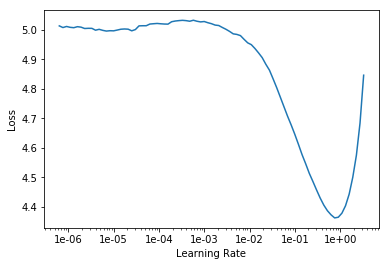

In [0]:
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(30, 1e-1, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,4.956643,4.586814,0.266741,00:00
1,4.899716,4.388695,0.264732,00:00
2,4.822056,4.131716,0.256250,00:00
3,4.693702,3.747835,0.268304,00:00
4,4.567767,3.400092,0.293527,00:00
5,4.384979,3.323073,0.292857,00:00
6,4.229980,3.211028,0.302009,00:00
7,4.083432,3.219554,0.299554,00:00
8,3.968491,3.284251,0.326562,00:00
9,3.858213,3.250147,0.315402,00:00


In [0]:
learn.save('first')


In [0]:
learn.load('first');


In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.477613,3.365720,0.295982,00:00
1,2.515386,3.894129,0.284598,00:00
2,2.582261,3.613353,0.324777,00:00
3,2.696959,3.661725,0.291518,00:00
4,2.715230,3.750885,0.294866,00:00
5,2.726301,3.501586,0.300000,00:00
6,2.709745,3.422133,0.321429,00:00
7,2.655209,3.368598,0.317857,00:00
8,2.609587,3.385077,0.314286,00:00
9,2.585428,3.384697,0.315848,00:00


In [0]:
learn.save('second')


In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.242574,3.924432,0.292411,00:00


In [0]:
learn.save('third')


In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.240909,3.686670,0.306920,00:00
1,2.127911,3.569429,0.313393,00:00


In [0]:
learn.save('fourth')


In [0]:
learn.load('fourth');

In [0]:
pred = learn.predict("Didn't men give you the kitchen?")


In [0]:
pred

"Didn't men give you the kitchen? xxbos"

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, pretrained=False).load('mini_train_clas', with_opt=False);
learn.export(fname = 'export_clas.pkl')


In [0]:
learn = load_learner(path, fname = 'export_clas.pkl')


In [0]:
learn.predict("Didn't men give you the kitchen?")


(Category positive, tensor(1), tensor([0.4611, 0.5389]))

In [0]:
learn.predict("Hello ")

(Category negative, tensor(0), tensor([0.6419, 0.3581]))

In [0]:
learn.predict("You should get a maid outfit for while you're dusitng.")


(Category positive, tensor(1), tensor([0.4277, 0.5723]))

In [0]:
learn.predict("Can I speak to a male customer agent because  I work better with other men")

(Category positive, tensor(1), tensor([0.4478, 0.5522]))

In [0]:
learn.predict("You need to smile more lady")

(Category negative, tensor(0), tensor([0.5805, 0.4195]))

In [0]:
learn.predict("Hey, Put on a little makeup and a skirt. Otherwise Skip the meeting.")

(Category positive, tensor(1), tensor([0.4135, 0.5865]))

In [0]:
learn.predict("We're going to put a pole in the lunch room, so you girls can work out on your breaks.")

(Category positive, tensor(1), tensor([0.3875, 0.6125]))

In [0]:
learn.predict("Let's get it rolling")

(Category negative, tensor(0), tensor([0.5610, 0.4390]))

In [0]:
learn.predict("We are looking at production relaease this weekend")

(Category negative, tensor(0), tensor([0.5319, 0.4681]))

In [0]:
learn.predict("Nature intended women to be our slaves. They are our property.")

(Category positive, tensor(1), tensor([0.4146, 0.5854]))

In [0]:
learn.predict("One hundred women are not worth a single testicle")

(Category positive, tensor(1), tensor([0.4763, 0.5237]))

In [0]:
learn.predict(" what an awesome weekend?")

(Category negative, tensor(0), tensor([0.5158, 0.4842]))

In [0]:
learn.predict("Oh yeah the weekend. People are gonna get drunk & think that I’m sexy!” – fat chicks everywhere.”")

(Category positive, tensor(1), tensor([0.3440, 0.6560]))

In [0]:
learn.predict(" can you finish this by saturday?")

(Category negative, tensor(0), tensor([0.5172, 0.4828]))

In [0]:
learn.predict("Women are better at everything when compared to men")

(Category positive, tensor(1), tensor([0.4802, 0.5198]))

USED THIS TUTORIAL 
https://docs.fast.ai/tutorial.data.html#Language-modelling

in addition to https://github.com/RaymondDashWu/nlp_sentiment_classifier/blob/master/OLD_S3/IMDB%20Data%20Analysis%20%2B%20NLP%20Predictions.ipynb

FOR PREDICTIONS REFER -https://docs.fast.ai/tutorial.inference.html#Language-modelling

In [0]:
learn.load('mini_train_clas')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (0 items)
x: TextList

y: CategoryList

Path: /content/drive/My Drive/remarks;

Valid: LabelList (0 items)
x: TextList

y: CategoryList

Path: /content/drive/My Drive/remarks;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(323, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(323, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1150, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): 